#We are applying machine learning algorithm to predict the price of house based on Features

In [313]:
#Impoting Libraries

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import os


In [315]:
# Load the data set of house price prediction


In [316]:
df = pd.read_csv("house_price.csv", na_values = "?")

In [317]:
#Information about the data 

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [319]:
print("Unique Value of BHK :" ,df['BHK'].unique())
print("Unique value of  Location :" ,df['Location'].unique())
print("Unique Value of Furnishing :",df['Furnishing'].unique())
print("Unique Value of Floor :",df['Floor'].unique())
print("Unique Value of Old(years) :",df['Old(years)'].unique())
print("Unique Value of Sq.ft :",df['Sq.ft'].unique())
print("Unique Value of Price :",df['Price'].unique())

Unique Value of BHK : [3 2]
Unique value of  Location : ['Bommanahalli' 'Whitefield']
Unique Value of Furnishing : [1 0]
Unique Value of Floor : [ 3  0  9  1  8 10  7 13  2 12 11  4]
Unique Value of Old(years) : [ 1 10  5]
Unique Value of Sq.ft : [3000 1650 1000 1600 1200 1760 1870 2200 2100 1704 1326 1088 1744 1060
  950 3155 1280 1033 1135 1471 2292 1290 1089 1250 1300 2180 1568 1768
 1245 1251 1400 1500 1381  960 1675 2117 1333 1460  767 1050 1375]
Unique Value of Price : [28000 18000 16400 27000 20000 39500 35000 42000 21000 14000 22000 16000
 45000 23000 16500 39000 26000 15500 17000 24000 30000 25000 19000 19500
 11000 33000]


In [320]:
#shape of Data

In [321]:
df.shape

(1000, 7)

In [322]:
#statistical Information

In [323]:
df.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [324]:
df.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [325]:
#Checking if the Dataset contains Nullvalues

In [326]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("Total Missing Values",df.isna().sum().sum())

Missing Values by Column
------------------------------
Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64
------------------------------
Total Missing Values 0


In [327]:
#Identify The data types of Variables

In [328]:
df.dtypes

Location      object
BHK            int64
Furnishing     int64
Sq.ft          int64
Old(years)     int64
Floor          int64
Price          int64
dtype: object

In [329]:
#Correlation and covariance


In [330]:
df.corr()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
BHK,1.000000,0.136625,0.689055,-0.186380,0.337754,0.633094
Furnishing,0.136625,1.000000,0.042385,0.091563,-0.078199,0.018996
Sq.ft,0.689055,0.042385,1.000000,-0.258306,0.376009,0.831104
Old(years),-0.186380,0.091563,-0.258306,1.000000,-0.197940,-0.304325
Floor,0.337754,-0.078199,0.376009,-0.197940,1.000000,0.599192
Price,0.633094,0.018996,0.831104,-0.304325,0.599192,1.000000


In [331]:
#Visualize the correlation in dataset

Text(0.5, 1.0, 'Correlation between two variable')

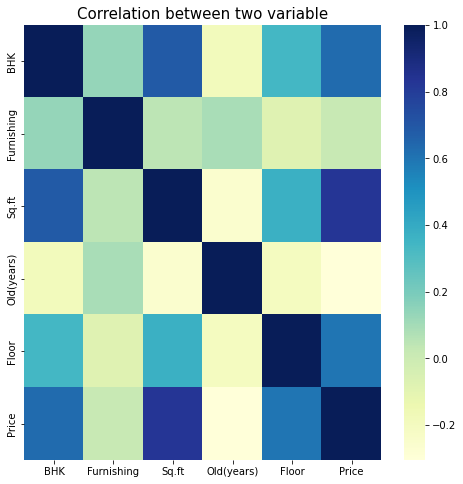

In [332]:
plt.figure(figsize= (8,8))

sns.heatmap(df.corr(), cmap="YlGnBu")
plt.title("Correlation between two variable", size=15)

In [333]:
df.cov()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
BHK,0.246150,0.032304,1.679487e+02,-0.281926,0.543804,2.420584e+03
Furnishing,0.032304,0.227123,9.923600e+00,0.133041,-0.120941,6.976456e+01
Sq.ft,167.948681,9.923600,2.413487e+05,-386.894672,599.462417,3.146516e+06
Old(years),-0.281926,0.133041,-3.868947e+02,9.295454,-1.958443,-7.150317e+03
Floor,0.543804,-0.120941,5.994624e+02,-1.958443,10.531306,1.498508e+04
Price,2420.584184,69.764565,3.146516e+06,-7150.317417,14985.081582,5.938876e+07


Text(0.5, 1.0, 'Covariance')

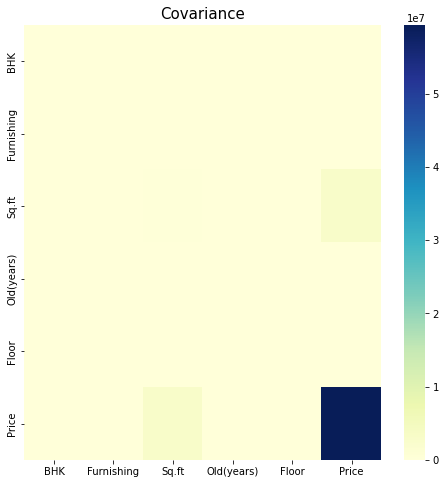

In [334]:
#visualize covariance
plt.figure(figsize= (8,8))

sns.heatmap(df.cov(), cmap="YlGnBu")
plt.title("Covariance", size=15)

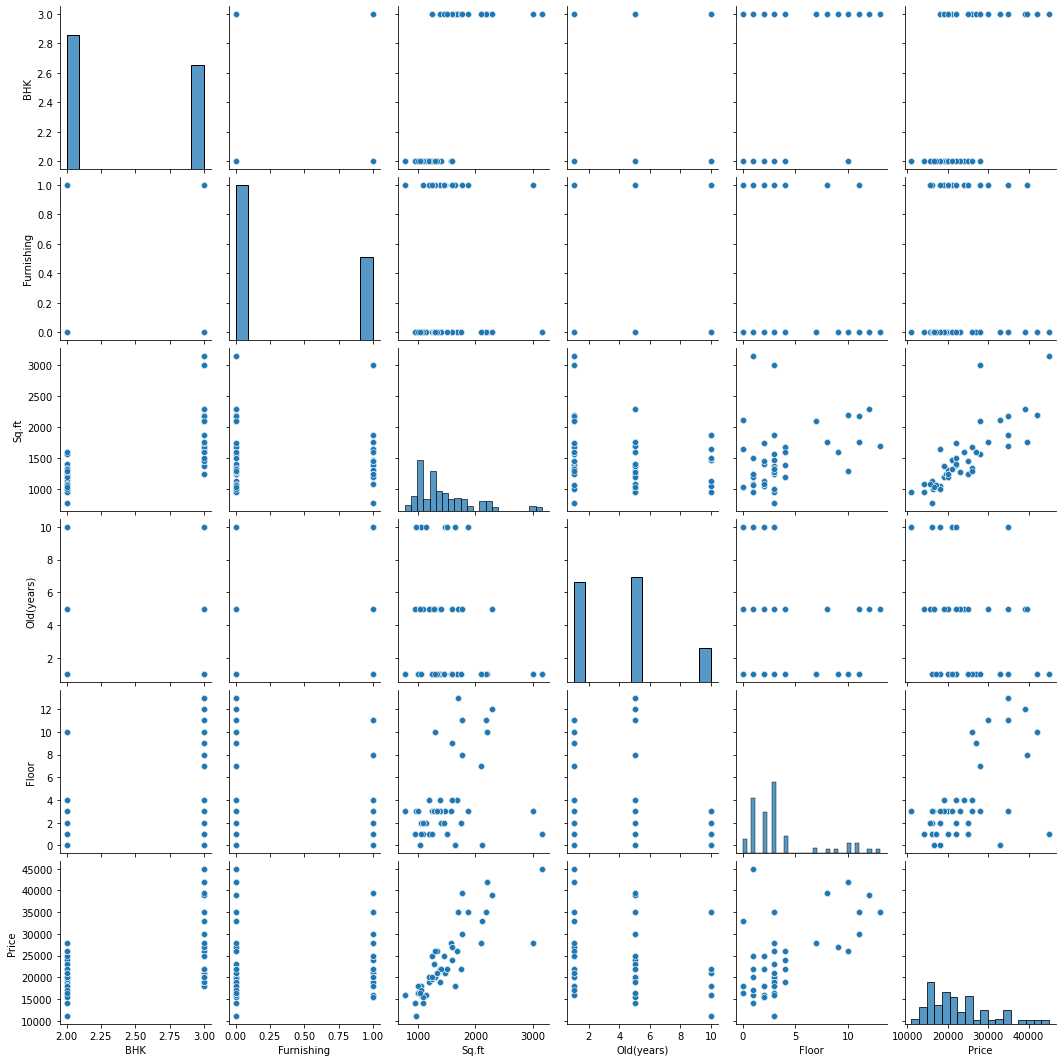

In [335]:
sns.pairplot(df)

In [336]:
#visualize the datasets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


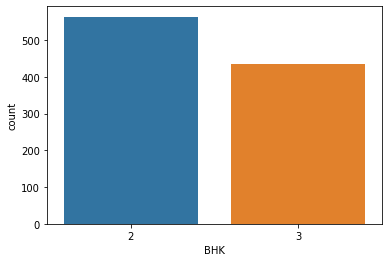

In [337]:
sns.countplot(df['BHK'], label="Price")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


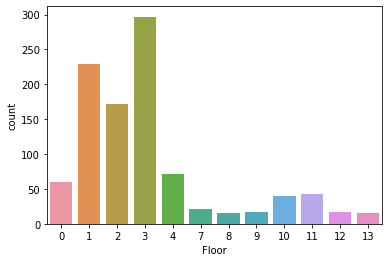

In [338]:
sns.countplot(df['Floor'], label="Price")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


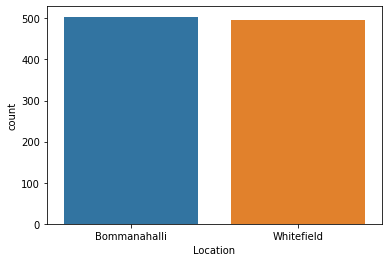

In [339]:
sns.countplot(df['Location'], label="Price")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


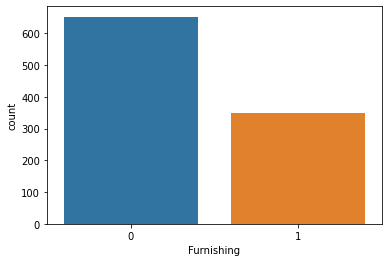

In [340]:
sns.countplot(df['Furnishing'], label="Price")

<BarContainer object of 7 artists>

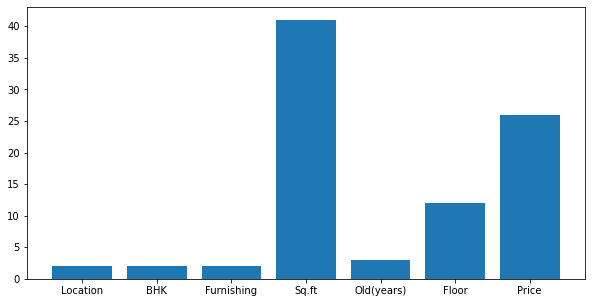

In [341]:
plt.figure(figsize=(10,5))
plt.bar(df.columns,df.nunique())

In [342]:
# find categorical value 

In [343]:

categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'. format(len(categorical)))

There are 1 categorical variables


In [344]:
#we use LabelEncoder because in object there are two value if there is more than two value we use (pd.get_dummies or OneHotEncoder)
#use Labelencoder to change categorical value into numerical


In [345]:
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
  if df[i].dtypes == 'object':
    df[i] = LabelEncoder().fit_transform(df[i])

In [346]:

df.dtypes

Location      int64
BHK           int64
Furnishing    int64
Sq.ft         int64
Old(years)    int64
Floor         int64
Price         int64
dtype: object

In [347]:
#seperate dataset into X and Y 

In [348]:
x = df.drop(["Price"],axis=1)
y = df['Price']

In [349]:
# use standardScaler to standardise the value

In [350]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [351]:
x

array([[-0.99203175,  1.1373557 ,  1.36878165,  3.15947496, -0.99398817,
        -0.14336036],
       [-0.99203175,  1.1373557 ,  1.36878165,  0.41013441,  1.95942666,
        -1.06826592],
       [ 1.00803226, -0.87923242, -0.73057671, -0.91362216,  0.31864064,
        -0.14336036],
       ...,
       [-0.99203175, -0.87923242, -0.73057671, -0.84641606,  0.31864064,
        -1.06826592],
       [-0.99203175,  1.1373557 , -0.73057671,  0.10465212,  1.95942666,
        -0.75996407],
       [ 1.00803226,  1.1373557 ,  1.36878165,  0.65044714,  0.31864064,
         2.32305445]])

In [352]:
# use train_test_split to split the data set into train and test

In [353]:
from sklearn.model_selection import train_test_split 

In [354]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [355]:
#Libraries for model 

In [356]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier() 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


nb=GaussianNB()


#LinearRegression

In [357]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [358]:
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [359]:
lr_score_train = lr.score(x_train, y_train)
lr_score_test = lr.score(x_test,y_test)

print(lr_score_train)
print(lr_score_test)

0.838499012638583
0.8432400276436331


#random Forest Classifier

In [360]:
#Random Forest Classifier

In [361]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)

RandomForestClassifier()

In [362]:
test_pred = rfc.predict(x_test)
train_pred = rfc.predict(x_train)

In [363]:
rfc_train = accuracy_score(y_train,train_pred)
rfc_test = accuracy_score(y_test, test_pred)

In [364]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

       11000       1.00      1.00      1.00         6
       14000       1.00      1.00      1.00        10
       15500       1.00      1.00      1.00        13
       16000       1.00      1.00      1.00        12
       16400       1.00      1.00      1.00         2
       16500       1.00      1.00      1.00         2
       17000       1.00      1.00      1.00         3
       18000       1.00      1.00      1.00         8
       19000       1.00      1.00      1.00         7
       19500       1.00      1.00      1.00         2
       20000       1.00      1.00      1.00        15
       21000       1.00      1.00      1.00        11
       22000       1.00      1.00      1.00        17
       23000       1.00      1.00      1.00         4
       24000       1.00      1.00      1.00         5
       25000       1.00      1.00      1.00        17
       26000       1.00      1.00      1.00        17
       27000       1.00    

In [365]:
#Decision Tree

In [366]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [367]:
dtc_train =  dtc.score(x_train,y_train)
dtc_test = dtc.score(x_test,y_test)

In [368]:
y_pred = dtc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  return fun(*args, **kwargs)


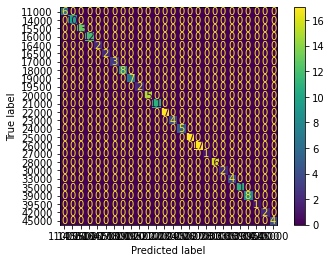

Accuracy of model :  1.0


In [369]:
performance = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(dtc,x_test,y_test)
plt.show()
dtc_acc = print("Accuracy of model : ", accuracy_score(y_test, y_pred))

In [370]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       11000       1.00      1.00      1.00         6
       14000       1.00      1.00      1.00        10
       15500       1.00      1.00      1.00        13
       16000       1.00      1.00      1.00        12
       16400       1.00      1.00      1.00         2
       16500       1.00      1.00      1.00         2
       17000       1.00      1.00      1.00         3
       18000       1.00      1.00      1.00         8
       19000       1.00      1.00      1.00         7
       19500       1.00      1.00      1.00         2
       20000       1.00      1.00      1.00        15
       21000       1.00      1.00      1.00        11
       22000       1.00      1.00      1.00        17
       23000       1.00      1.00      1.00         4
       24000       1.00      1.00      1.00         5
       25000       1.00      1.00      1.00        17
       26000       1.00      1.00      1.00        17
       27000       1.00    

In [371]:
# K Neighbors Classifier

In [372]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [373]:
knc_train = knc.score(x_train,y_train)
knc_test = knc.score(x_test,y_test)

In [374]:
y_pred = knc.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  return fun(*args, **kwargs)


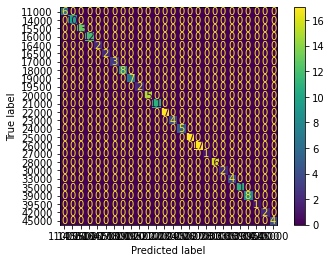

Accuracy of model: 1.0


In [377]:


performance = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(knc,x_test,y_test)
plt.show()
knc_acc = print('Accuracy of model:',accuracy_score(y_test,y_pred))

In [378]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       11000       1.00      1.00      1.00         6
       14000       1.00      1.00      1.00        10
       15500       1.00      1.00      1.00        13
       16000       1.00      1.00      1.00        12
       16400       1.00      1.00      1.00         2
       16500       1.00      1.00      1.00         2
       17000       1.00      1.00      1.00         3
       18000       1.00      1.00      1.00         8
       19000       1.00      1.00      1.00         7
       19500       1.00      1.00      1.00         2
       20000       1.00      1.00      1.00        15
       21000       1.00      1.00      1.00        11
       22000       1.00      1.00      1.00        17
       23000       1.00      1.00      1.00         4
       24000       1.00      1.00      1.00         5
       25000       1.00      1.00      1.00        17
       26000       1.00      1.00      1.00        17
       27000       1.00    

In [379]:
#Support Vector Machine

In [380]:
#Support vector Machine 
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [381]:
svm_train = svm.score(x_train,y_train)
svm_test = svm.score(x_test,y_test)

In [382]:
y_pred = svm.predict(x_test)
x_pred = svm.predict(x_train)

In [383]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [384]:
nb_train = nb.score(x_train,y_train)
nb_test = nb.score(x_test,y_test)

In [385]:
y_predict = nb.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  return fun(*args, **kwargs)


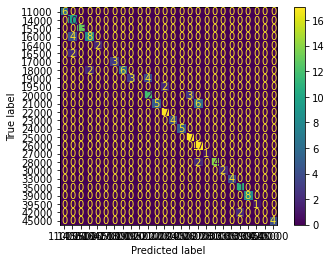

Accuracy of model: 0.745


In [386]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

performance = confusion_matrix(y_test,y_predict)

plot_confusion_matrix(svm,x_test,y_test)
plt.show()
print('Accuracy of model:',accuracy_score(y_test,y_predict))

#score Table

In [390]:
from pandas.core.frame import DataFrame
Model_Compare = DataFrame({
    'Model' : ['Linear Regression','SVM','KNN','Decision Tree','Random Forest', 'naive_bayes'],
    'Scores_test': [lr_score_test*100,svm_test*100,knc_test*100,dtc_test*100,rfc_test*100, nb_test*100],
    'Scores_train': [lr_score_train*100,svm_train*100,knc_train*100,dtc_train*100,rfc_train*100,nb_train*100]
    })
Model_Compare

,Model,Scores_test,Scores_train
0,Linear Regression,84.324003,83.849901
1,SVM,86.500000,85.750000
2,KNN,100.000000,100.000000
3,Decision Tree,100.000000,100.000000
4,Random Forest,100.000000,100.000000
5,naive_bayes,74.500000,75.625000


In [391]:
Model_Comparison_df = Model_Compare.sort_values(by= 'Scores_test', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

,Model,Scores_test,Scores_train
0,KNN,100.000000,100.000000
1,Decision Tree,100.000000,100.000000
2,Random Forest,100.000000,100.000000
3,SVM,86.500000,85.750000
4,Linear Regression,84.324003,83.849901
5,naive_bayes,74.500000,75.625000


In [392]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       11000       1.00      1.00      1.00         6
       14000       0.71      1.00      0.83        10
       15500       1.00      1.00      1.00        13
       16000       0.80      0.67      0.73        12
       16400       1.00      1.00      1.00         2
       16500       1.00      1.00      1.00         2
       17000       1.00      1.00      1.00         3
       18000       0.00      0.00      0.00         8
       19000       0.44      1.00      0.61         7
       19500       1.00      1.00      1.00         2
       20000       0.00      0.00      0.00        15
       21000       0.00      0.00      0.00        11
       22000       0.54      0.88      0.67        17
       23000       1.00      1.00      1.00         4
       24000       1.00      1.00      1.00         5
       25000       0.85      1.00      0.92        17
       26000       0.46      1.00      0.63        17
       27000       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  labels : list, optional
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  labels : list, optional
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  labels : list, optional


#from all the model we under stand the best Model fit for this Datasets is


In [ ]:
#The algorithm that gives best accuracy or 85% above accuracy
#RandomForestClassifier is the model that give 1.0 accuracy
#Decision Tree classifier is the model that give 1.0 accuracy
#K neighbour classifier is the model that give 1.0 accuracy
# SVM (support vector machine) this algorithm gives more than 85% but less than 90%

In [ ]:
# those model that gives less then 85% accuracy 
#Linear Regression
#Naive Bayes Algorithm